In [187]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [188]:
import warnings
warnings.filterwarnings("ignore")

In [189]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [190]:
TRAIN_PATH = "/content/drive/MyDrive/Dev_data_to_be_shared.xlsx"
df = pd.read_excel(TRAIN_PATH)

In [191]:
val_df = pd.read_excel('/content/drive/MyDrive/validation_data_to_be_shared.xlsx')

In [192]:
X_sub = val_df

# Warning
**There will be two csv files generated in this notebook one is with primary key from first approach and another is from second approach without primary key.**


There were no instructions to remove primary key thats why we attached two approaches.

# First approach - XGBoost
-> Note if primary key was included


In [291]:
# Getting the properties of the data
df.describe()

,Primary key,Target,demog_1,demog_3,demog_5,demog_6,demog_7,demog_8,demog_9,demog_11,demog_12,demog_13,demog_14,demog_15,demog_16,demog_17,demog_18,demog_19,demog_20,demog_21,txn_1,txn_2,txn_3,txn_4,txn_5,txn_6,txn_7,txn_8,txn_9,txn_10,txn_11,txn_12,txn_13,txn_14,txn_15,txn_16,txn_17,txn_18,txn_19,txn_20,txn_21,txn_22,txn_23,txn_24,txn_25,txn_26,txn_27,txn_28,txn_29,txn_30,txn_31,txn_32,txn_33,txn_34,txn_35,txn_36,txn_37,txn_38,txn_39,txn_40,txn_41,txn_42,txn_43,txn_44,txn_45,txn_46,txn_47,txn_48,txn_49,txn_50,txn_51,txn_52,txn_53,txn_54,txn_55,txn_56,txn_57,txn_58,txn_59,txn_60,txn_61,txn_62,txn_63,txn_64,txn_65,txn_66,txn_67,txn_68,txn_69,txn_70,txn_71,txn_72,txn_73,txn_74,txn_75,txn_76,txn_77,txn_78,txn_79,others_1,others_2,others_3,others_4,others_5,others_6,others_7,others_8,others_9,others_10,others_11,others_12,others_13,others_14,others_15,others_16,others_17,others_18,others_19,others_20,others_21,others_22,others_23,others_24,others_25,others_26,others_27,others_28,others_29,others_30,others_31,others_32,demog_23,demog_24,demog_25,demog_26,demog_27,demog_28,demog_29,demog_30,demog_31,demog_32,demog_33,demog_34,demog_35,demog_36,demog_37,demog_38,others_33,others_34,others_35,others_36,others_37,others_38,others_39,others_40,others_41,txn_80,txn_81,demog_39,demog_41,others_42,others_43,others_44,others_45,demog_42
count,100000.000000,100000.000000,96331.000000,99994.000000,99975.000000,99999.000000,99994.0,96249.000000,87086.000000,99999.000000,99999.0,96984.000000,96984.000000,96984.000000,96984.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,74206.000000,74206.000000,74206.000000,74206.000000,74206.000000,74206.000000,74206.000000,74206.000000,74206.000000,74206.000000,74206.000000,74206.000000,74206.000000,74206.000000,74206.000000,74206.000000,74206.000000,74206.000000,74206.000000,74206.000000,74206.000000,74206.000000,74206.000000,74206.000000,74206.000000,74206.000000,74206.000000,74206.000000,74206.000000,74206.000000,74206.000000,74206.000000,74206.000000,74206.000000,74206.0,74206.0,74206.000000,74206.000000,74206.000000,74206.000000,74206.000000,74206.000000,74206.000000,74206.000000,74206.000000,74206.000000,74206.000000,74206.000000,74206.0,74206.0,74206.000000,74206.000000,74206.000000,74206.000000,74206.000000,74206.000000,74206.000000,74206.000000,74206.000000,74206.000000,74206.000000,74206.000000,74206.000000,74206.000000,74206.0,74206.000000,74206.000000,74206.000000,74206.000000,74206.0,74206.0,74206.0,74206.000000,74206.000000,74206.000000,74206.000000,54576.000000,43272.000000,55044.000000,100000.000000,100000.000000,99999.000000,99999.000000,83182.000000,99997.000000,99997.000000,99997.000000,99997.000000,99997.000000,99997.000000,100000.000000,100000.000000,100000.000000,58635.000000,58635.000000,58635.000000,100000.000000,99999.000000,99999.000000,82713.000000,82713.000000,82713.000000,82713.000000,82713.000000,82713.000000,99991.000000,99991.000000,99999.00000,99999.00000,99999.000000,99999.000000,99999.000000,99706.000000,99999.000000,99706.000000,99999.000000,99999.000000,99999.000000,99997.000000,99997.000000,99997.000000,99997.000000,99997.000000,99997.000000,99997.000000,99997.000000,99997.0,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,99999.000000,99999.000000,42522.000000,48535.000000,100000.000000,100000.00000,2105.000000,4579.000000,874.000000,694.000000,100000.000000
mean,50000.500000,0.020000,79.543376,101.323279,3.290163,1.017180,1.0,41.191701,0.326103,0.002250,0.0,0.950889,0.001681,0.781820,0.993236,0.922219,0.002380,0.963630,0.357964,0.209932,0.128655,0.312252,0.222866,0.488869,2.737191,5.911112,0.799423,1.999744,9.059604,29.053055,12.603347,22.977010,0.182101,0.574024,0.004973,0.013813,0.039929,0.096812,0.280665,0.783468,0.008315,0.020470,0.010147,0.027949,0.772512,2.188435,0.011697,0.034795,0.058216,0.192747,0.031076,0.155446,0.010120,0.030874,0.0,0.0,0.001523,0.004029,1.211977,7.190834,0.441891,1.0355

In [292]:
# Checking for null values in dataset
df.isnull().sum().max()

99306

In [293]:
# Getting the percentage of each class present in the dataset
print('Not Mules', round(df['Target'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Mules', round(df['Target'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

Not Mules 98.0 % of the dataset
Mules 2.0 % of the dataset


In [294]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Impute missing values for numerical columns with the mean
df_numeric = df.select_dtypes(include=['number'])
X_sub_numeric = X_sub.select_dtypes(include=['number'])
X_sub_numeric_imputed = X_sub_numeric.fillna(X_sub_numeric.mean())
df_numeric_imputed = df_numeric.fillna(df_numeric.mean())

# Impute missing values for categorical columns with the most frequent category
df_categorical = df.select_dtypes(include=['object', 'category'])
X_sub_categorical = X_sub.select_dtypes(include=['object', 'category'])
imputer = SimpleImputer(strategy='most_frequent')
df_categorical_imputed = pd.DataFrame(imputer.fit_transform(df_categorical), columns=df_categorical.columns)
X_sub_categorical_imputed = pd.DataFrame(imputer.fit_transform(X_sub_categorical), columns=X_sub_categorical.columns)

# Concatenate the imputed numerical and categorical DataFrames
df_imputed = pd.concat([df_numeric_imputed, df_categorical_imputed], axis=1)
X_sub_imputed = pd.concat([X_sub_numeric_imputed, X_sub_categorical_imputed], axis=1)

In [295]:
# Check for null values in the imputed dataset
df_imputed.isnull().sum().max(), X_sub_imputed.isnull().sum().max()

(0, 0)

In [296]:
primary_keys = X_sub_imputed['Primary key']

In [297]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_columns = df_imputed.select_dtypes(include=['object', 'category']).columns

# Create a label encoder object
label_encoder = LabelEncoder()

df_imputed[categorical_columns[0]] = label_encoder.fit_transform(df_imputed[categorical_columns[0]].astype(str))
X_sub_imputed[categorical_columns[0]] = label_encoder.fit_transform(X_sub_imputed[categorical_columns[0]].astype(str))
# Label encode each categorical column
for col in categorical_columns[1:]:
  df_imputed[col] = label_encoder.fit_transform(df_imputed[col].astype(str))
  X_sub_imputed[col] = label_encoder.fit_transform(X_sub_imputed[col].astype(str))

In [298]:
# Getting the shape of the imputed and encoded dataset
df_imputed.shape, X_sub_imputed.shape

((100000, 177), (50000, 176))

In [299]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

column_to_scale = 'Primary key'
column_values = df_imputed[column_to_scale].values.reshape(-1, 1)
column_values_new = X_sub_imputed[column_to_scale].values.reshape(-1, 1)

scaler_1 = MinMaxScaler()
df_imputed['Primary key'] = scaler_1.fit_transform(column_values)
scaler_2 = MinMaxScaler()
X_sub_imputed['Primary key'] = scaler_2.fit_transform(column_values_new)

In [300]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

dtrain = xgb.DMatrix(df_imputed.drop(columns=['Target']), label=df_imputed['Target'])

params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'max_depth': 5,
    'learning_rate': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42,
}

num_round = 100
bst = xgb.train(params, dtrain, num_round)

In [301]:
dsub = xgb.DMatrix(X_sub_imputed)
y_sub_pred_proba = bst.predict(dsub)
y_sub_pred = [1 if prob > 0.5 else 0 for prob in y_sub_pred_proba]

In [302]:
submission_df = pd.DataFrame()
submission_df['primary key'] = primary_keys
submission_df['target values'] = y_sub_pred
submission_df['probability'] = y_sub_pred_proba

In [303]:
submission_df.to_csv('epoch0.csv', index=False)

# Second Approach : XGBoost + ANOVA
-> without primary key

In [304]:
# Dropping the primary key because it may lead to data leakage
df_imputed = df_imputed.drop(columns=['Primary key'])
X_sub_imputed = X_sub_imputed.drop(columns=['Primary key'])

In [305]:
# Shuffling the dataset
df_imputed = df_imputed.sample(frac=1, random_state=42)

In [306]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes for correlation calculation

fraud_df = df_imputed.loc[df_imputed['Target'] == 1]
non_fraud_df = df_imputed.loc[df_imputed['Target'] == 0][:2000]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,Target,demog_1,demog_3,demog_5,demog_6,demog_7,demog_8,demog_9,demog_11,demog_12,demog_13,demog_14,demog_15,demog_16,demog_17,demog_18,demog_19,demog_20,demog_21,txn_1,txn_2,txn_3,txn_4,txn_5,txn_6,txn_7,txn_8,txn_9,txn_10,txn_11,txn_12,txn_13,txn_14,txn_15,txn_16,txn_17,txn_18,txn_19,txn_20,txn_21,txn_22,txn_23,txn_24,txn_25,txn_26,txn_27,txn_28,txn_29,txn_30,txn_31,txn_32,txn_33,txn_34,txn_35,txn_36,txn_37,txn_38,txn_39,txn_40,txn_41,txn_42,txn_43,txn_44,txn_45,txn_46,txn_47,txn_48,txn_49,txn_50,txn_51,txn_52,txn_53,txn_54,txn_55,txn_56,txn_57,txn_58,txn_59,txn_60,txn_61,txn_62,txn_63,txn_64,txn_65,txn_66,txn_67,txn_68,txn_69,txn_70,txn_71,txn_72,txn_73,txn_74,txn_75,txn_76,txn_77,txn_78,txn_79,others_1,others_2,others_3,others_4,others_5,others_6,others_7,others_8,others_9,others_10,others_11,others_12,others_13,others_14,others_15,others_16,others_17,others_18,others_19,others_20,others_21,others_22,others_23,others_24,others_25,others_26,others_27,others_28,others_29,others_30,others_31,others_32,demog_23,demog_24,demog_25,demog_26,demog_27,demog_28,demog_29,demog_30,demog_31,demog_32,demog_33,demog_34,demog_35,demog_36,demog_37,demog_38,others_33,others_34,others_35,others_36,others_37,others_38,others_39,others_40,others_41,txn_80,txn_81,demog_39,demog_41,others_42,others_43,others_44,others_45,demog_42,country_code,demog_2,income,city_tier,occupation,demog_4,demog_10,demog_22,os,email_domain,demog_40,demog_43
98385,1,55.000000,101.323279,4.0,1.0,1.0,41.000000,0.000000,0.0,0.0,1.000000,0.000000,1.00000,1.000000,1.0,0.0,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,16.000000,1.000000,45.000000,1.000000,10.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.000000,48.000000,1.000000,27.000000,24.000000,24.000000,24.000000,0,0,0.0,0.0,1.000000,95.0,95.0,1.0,95.0,95.0,1.0,95,95,1,95.000000,95.000000,1.000000,1,0.0,0.0,10.000000,116.000000,0.000000,0.000000,10.000000,116.000000,9999.0,9999.0,0.0,0.0,0.0,0.0,92.0,7032.0,0.0,19.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0.0,0.0,22.000000,31.000000,0,0,87.887886,62.024896,28.808924,96.700288,1,20,10,2,2,6,6,0,1,0,2,0,0
22610,0,53.000000,101.000000,4.0,1.0,1.0,41.000000,0.000000,0.0,0.0,1.000000,0.000000,1.00000,1.000000,1.0,0.0,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,5.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,18.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.000000,0.000000,2.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,18.000000,12.000000,0.0,0.0,0.0,0.000000,28.000000,0.000000,16.000000,37.000000,4.703642,39.000000,0,0,0.0,0.0,1.000000,160.0,160.0,1.0,160.0,160.0,1.0,160,160,1,160.000000,160.000000,1.000000,1,0.0,0.0,0.000000,23.000000,0.000000,0.000000,0.000000,23.000000,126.0,9999.0,0.0,0.0,0.0,0.0,160.0,7521.0,0.0,21.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,1,0.0,0.0,9.000000,12.000000,1,1,87.887886,62.024896,28.808924,96.700288,1,20,7,2,1,5,6,0,1,0,2,0,0
99009,1,55.000000,101.000000,4.0,1.0,1.0,41.000000,0.000000,0.0,0.0,1.000000,0.000000,1.00000,1.000000,1.0,0.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.000000,35.000000,36.000000,0.000000,0.000000,0.000000,1.000000,2542.000

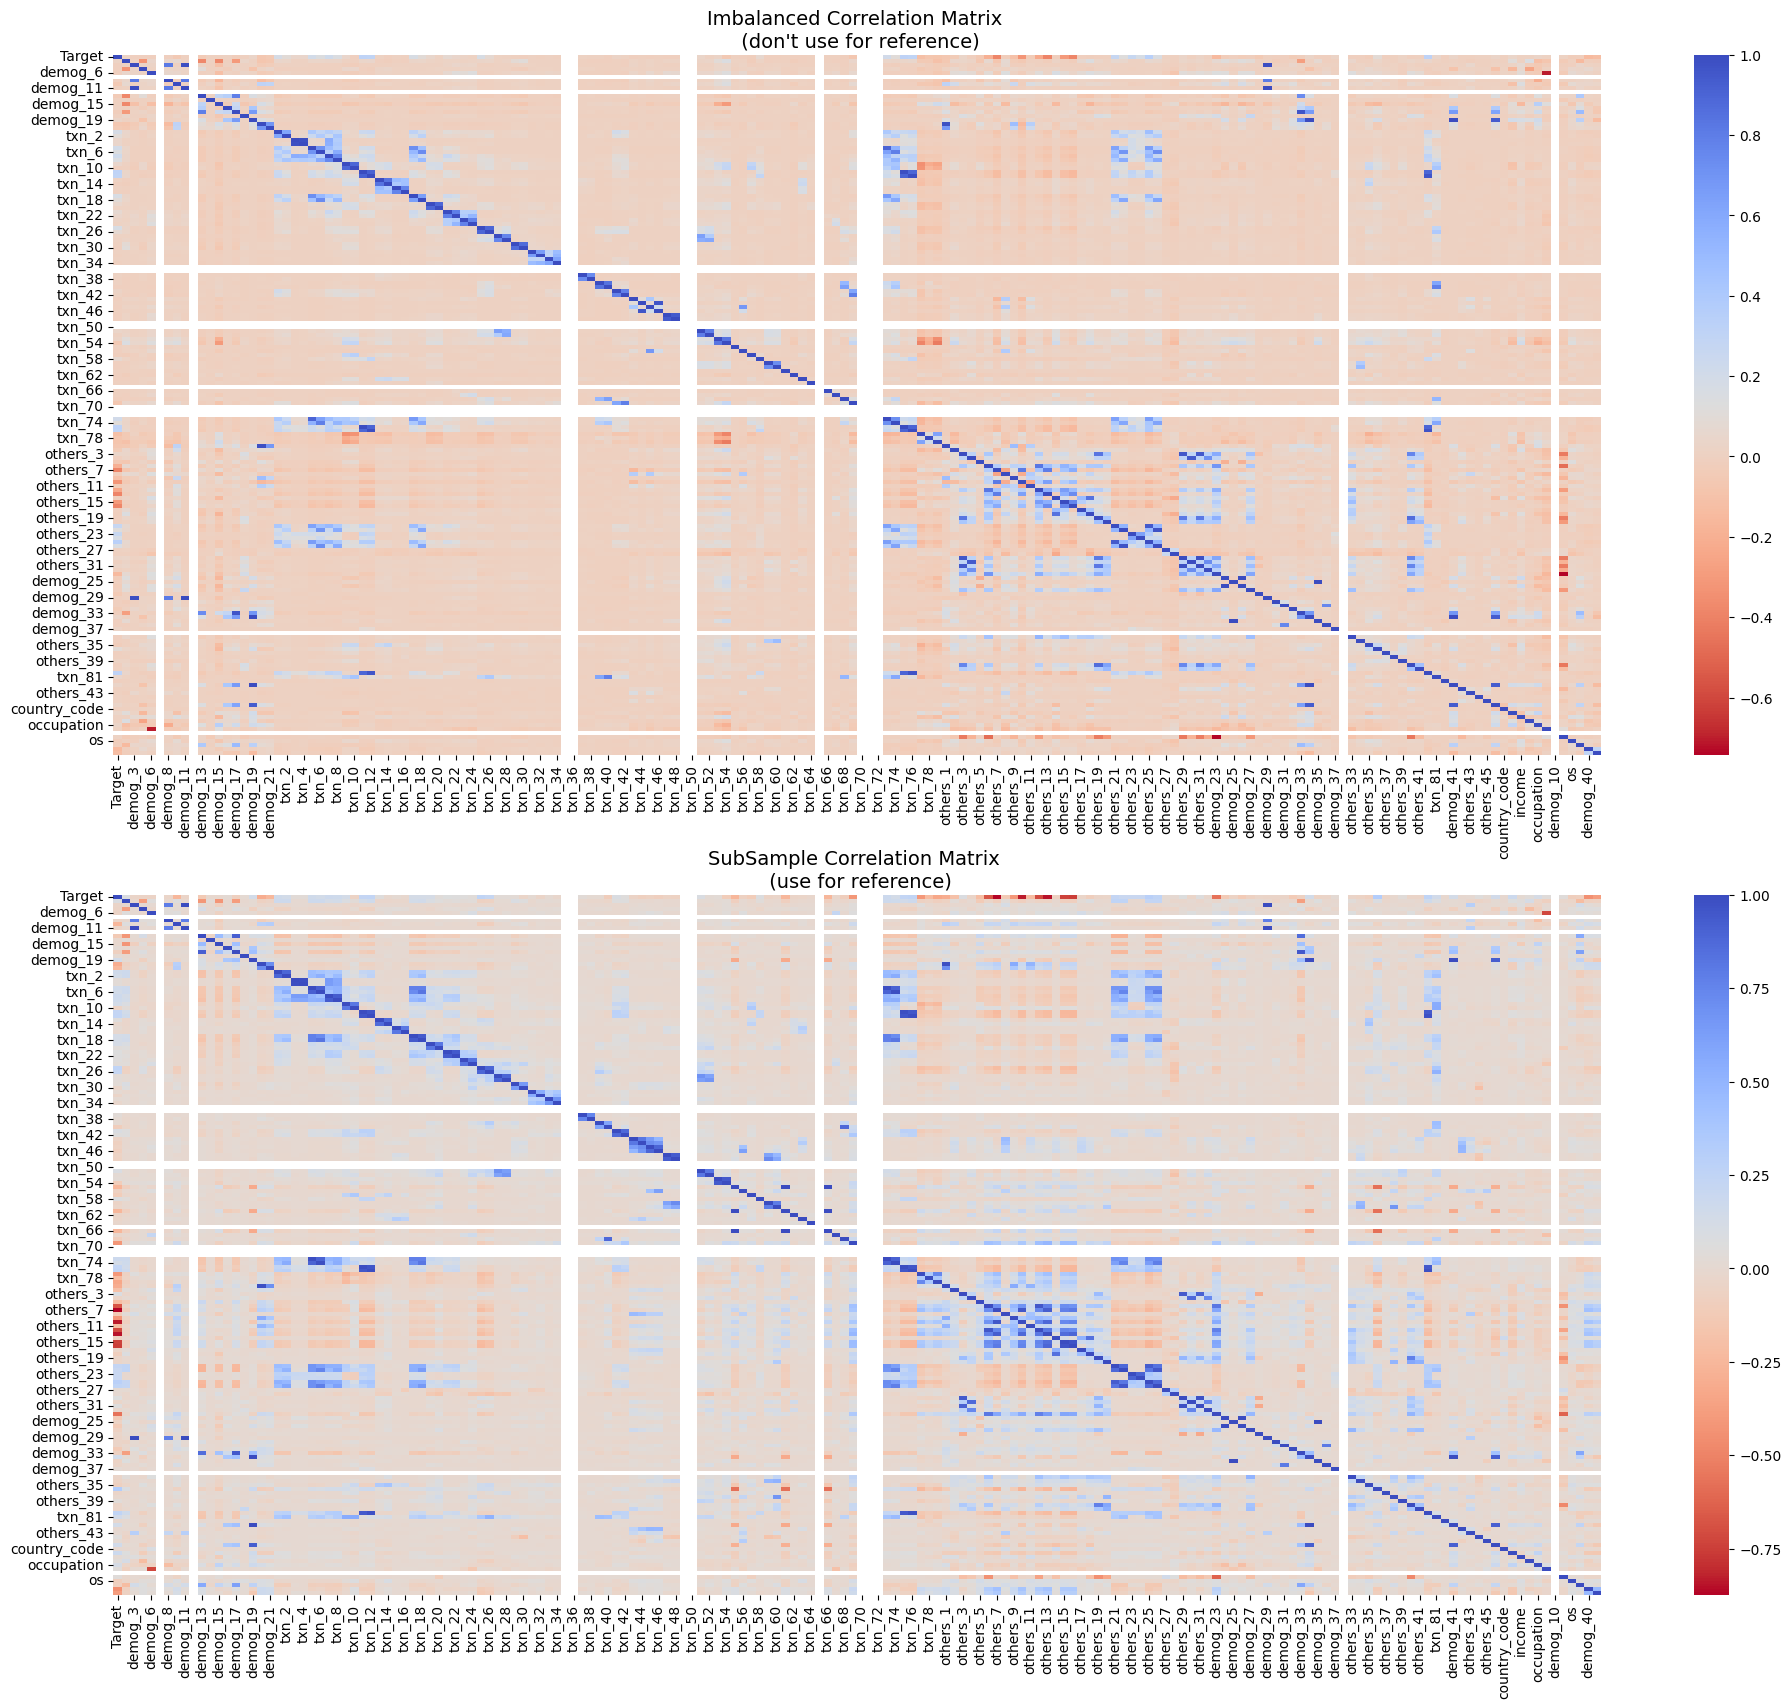

In [307]:
# Plotting the correlation matrix for unbalanced as well as balanced dataset

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

corr = df_imputed.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)


sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

Some of the columns in the correlation matrix is blank because of its stddev being zero due to only one type of value in the dataframe so we will remove those cols

In [308]:
ind = []
for i in range(len(sub_sample_corr['Target'])):
  val = sub_sample_corr['Target'][i]
  if pd.isna(val): ind.append(i)

drop_cols = []
for i in range(len(new_df.columns)):
  if i in ind:
    drop_cols.append(new_df.columns[i])

new_df = new_df.drop(columns=drop_cols)
df_imputed = df_imputed.drop(columns=drop_cols)
X_sub_imputed = X_sub_imputed.drop(columns=drop_cols)

these columns were removed ['demog_7', 'demog_12', 'txn_35', 'txn_36', 'txn_49', 'txn_50', 'txn_65', 'txn_70', 'txn_71', 'txn_72', 'demog_38', 'demog_10']

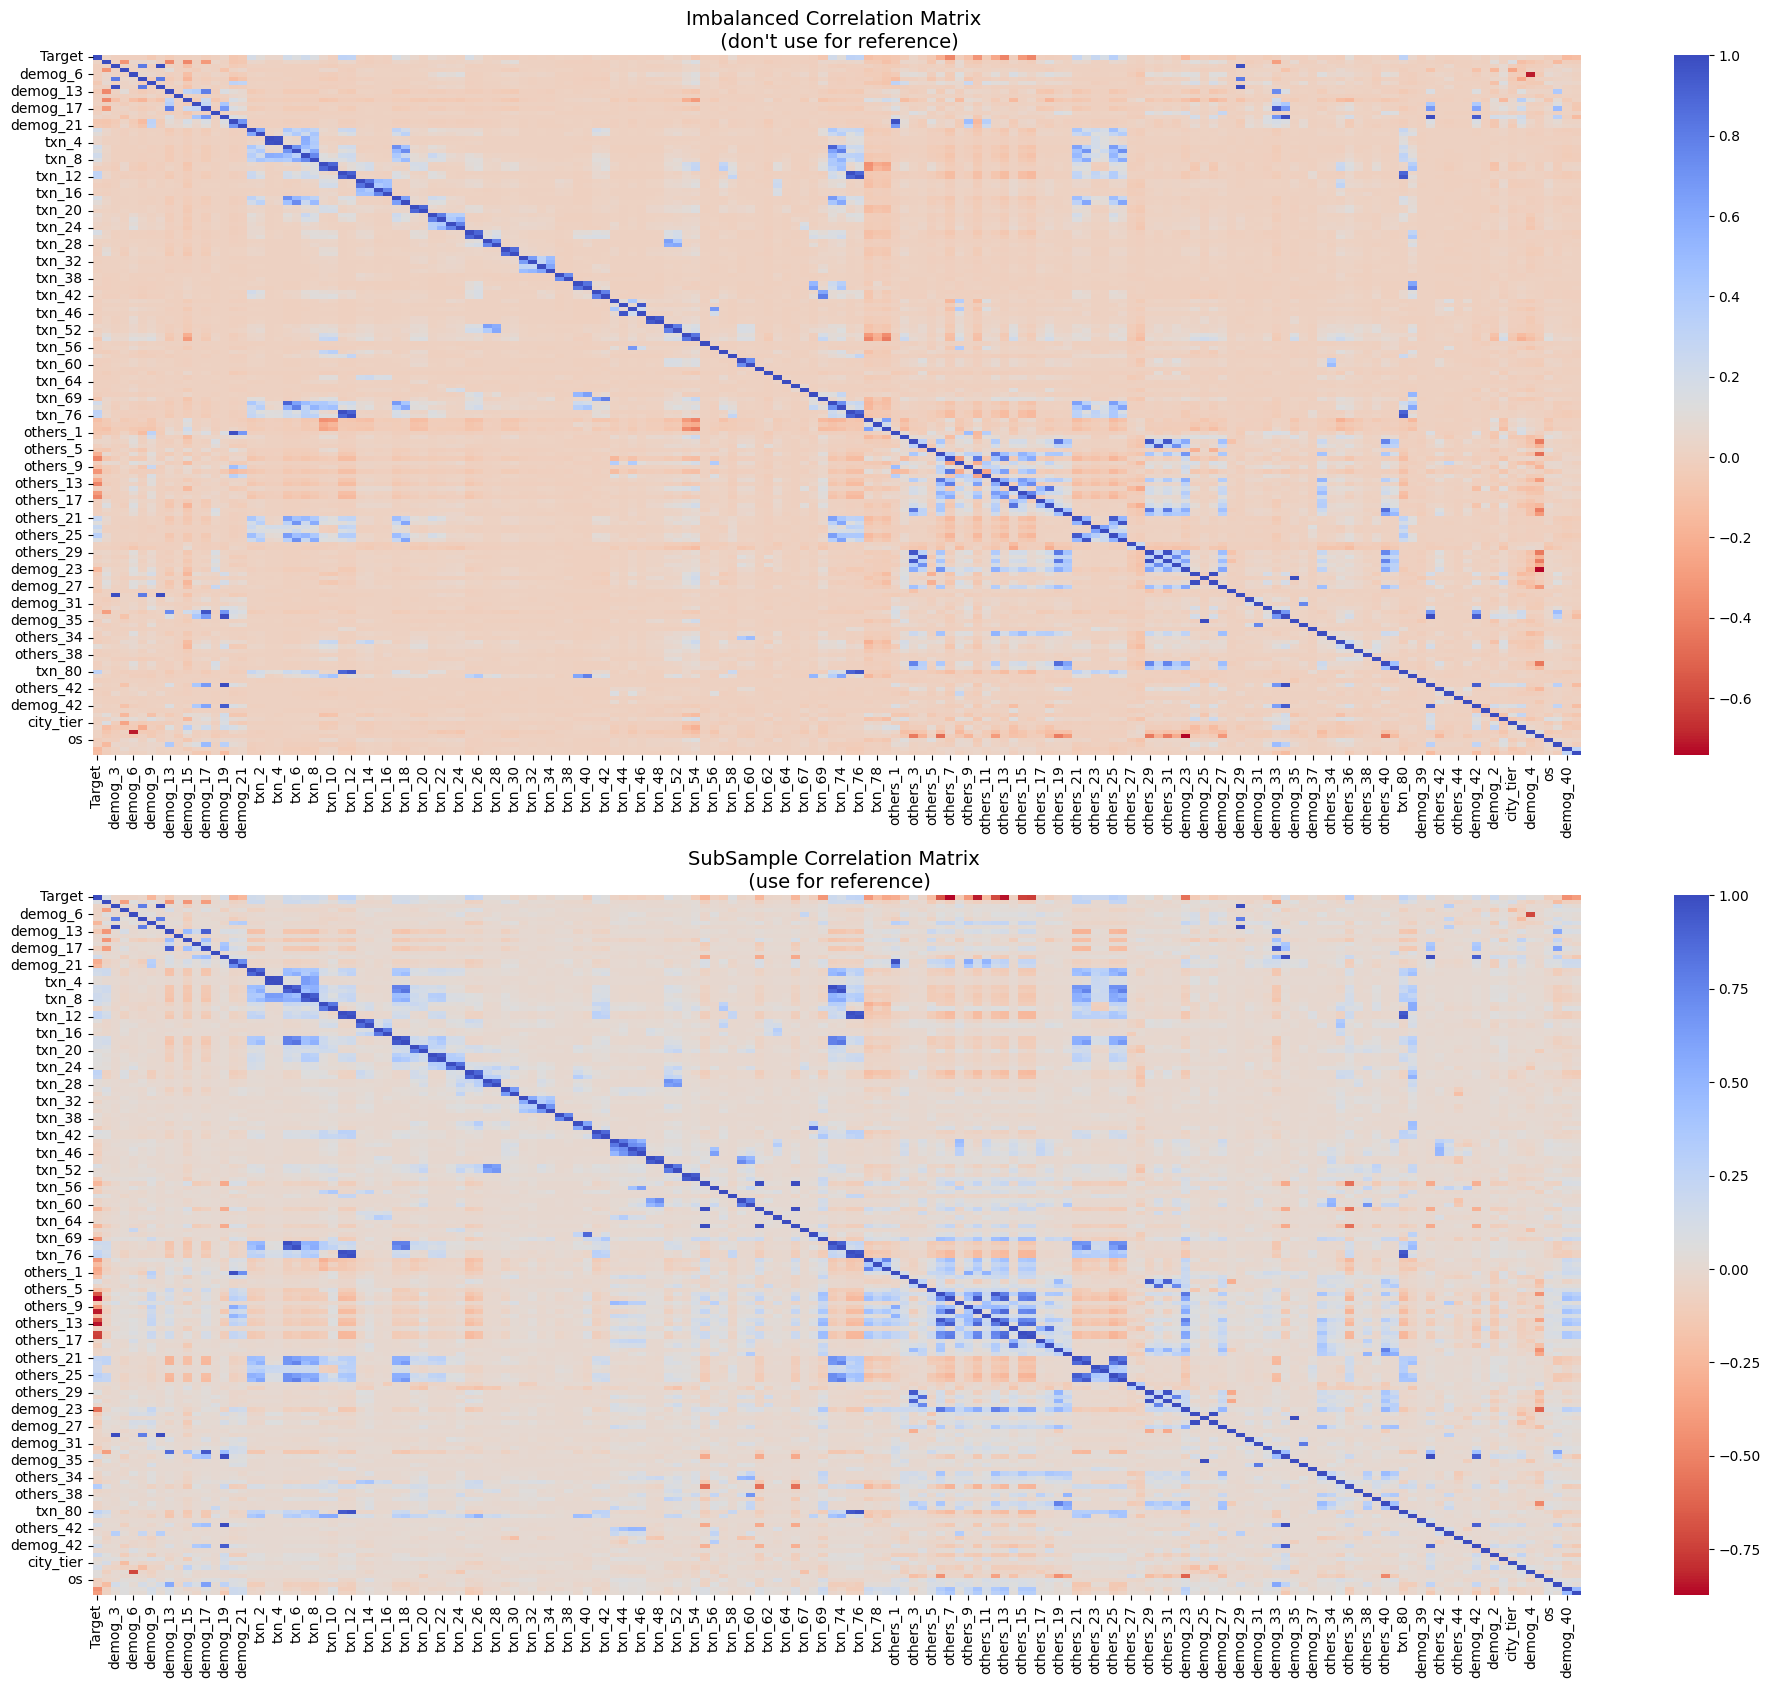

In [309]:
# Make sure we use the subsample in our correlation
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = df_imputed.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)

sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)

plt.show()

In [310]:
X = df_imputed.drop(columns=['Target'])
y = df_imputed['Target']

X_bal = new_df.drop(columns=['Target'])
y_bal = new_df['Target']

In [311]:
X.shape, X_sub_imputed.shape

((100000, 163), (50000, 163))

In [312]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_bal, y_bal, test_size=0.2, random_state=42, stratify=y_bal)

# Model 1: XGBoost Model by removing some columns whose correlations are null
# Accuracy: 99.71%

In [313]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'max_depth': 5,
    'learning_rate': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42,
}

num_round = 100
bst = xgb.train(params, dtrain, num_round, evals=[(dtest, 'eval')], early_stopping_rounds=10)

y_pred_proba = bst.predict(dtest)
y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_proba]

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

[0]	eval-logloss:0.15223
[1]	eval-logloss:0.13528
[2]	eval-logloss:0.12118
[3]	eval-logloss:0.10899
[4]	eval-logloss:0.09845
[5]	eval-logloss:0.08922
[6]	eval-logloss:0.08097
[7]	eval-logloss:0.07376
[8]	eval-logloss:0.06726
[9]	eval-logloss:0.06151
[10]	eval-logloss:0.05636
[11]	eval-logloss:0.05166
[12]	eval-logloss:0.04751
[13]	eval-logloss:0.04380
[14]	eval-logloss:0.04050
[15]	eval-logloss:0.03747
[16]	eval-logloss:0.03475
[17]	eval-logloss:0.03230
[18]	eval-logloss:0.03011
[19]	eval-logloss:0.02811
[20]	eval-logloss:0.02629
[21]	eval-logloss:0.02470
[22]	eval-logloss:0.02321
[23]	eval-logloss:0.02192
[24]	eval-logloss:0.02075
[25]	eval-logloss:0.01967
[26]	eval-logloss:0.01870
[27]	eval-logloss:0.01780
[28]	eval-logloss:0.01701
[29]	eval-logloss:0.01627
[30]	eval-logloss:0.01562
[31]	eval-logloss:0.01503
[32]	eval-logloss:0.01451
[33]	eval-logloss:0.01403
[34]	eval-logloss:0.01363
[35]	eval-logloss:0.01323
[36]	eval-logloss:0.01287
[37]	eval-logloss:0.01256
[38]	eval-logloss:0.01

In [314]:
df_imputed.shape

(100000, 164)

In [315]:
categorical_columns = list(df.select_dtypes(include='object').columns)
categorical_columns.remove('demog_10') # it was removed previously
categorical_columns

['country_code',
 'demog_2',
 'income',
 'city_tier',
 'occupation',
 'demog_4',
 'demog_22',
 'os',
 'email_domain',
 'demog_40',
 'demog_43']

In [316]:
cat_df_imputed = X_train[categorical_columns]
cat_df_imputed.head()

,country_code,demog_2,income,city_tier,occupation,demog_4,demog_22,os,email_domain,demog_40,demog_43
50077,20,6,2,2,5,6,1,0,2,2,2
632,20,10,1,6,6,6,1,0,2,1,2
59291,20,0,2,1,2,6,1,0,2,1,2
50882,20,8,7,1,0,6,1,1,2,1,2
87433,20,0,2,7,4,6,1,0,2,1,0


In [317]:
num_df_imputed = X_train_bal.drop(columns=categorical_columns)

In [318]:
num_df_imputed.shape, cat_df_imputed.shape

((3200, 152), (80000, 11))

In [319]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Calculating cramers score for categorical variables
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1)**2) / (n - 1)
    kcorr = k - ((k - 1)**2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Example: Calculate Cramér's V for two categorical columns
less_corr_cat_cols = []
for col in cat_df_imputed.columns:
  print(col, end=" ")
  cramers_value = cramers_v(cat_df_imputed[col], y)
  print(f"Cramér's V: {cramers_value}")
  if cramers_value < 0.01:
    less_corr_cat_cols.append(col)
less_corr_cat_cols

country_code Cramér's V: 0.0
demog_2 Cramér's V: 0.061008823183767415
income Cramér's V: 0.02829268508574592
city_tier Cramér's V: 0.04026841172246118
occupation Cramér's V: 0.04011163988296899
demog_4 Cramér's V: 0.010669417145235942
demog_22 Cramér's V: 0.007179092449478876
os Cramér's V: 0.021186563891304612
email_domain Cramér's V: 0.01849801990083717
demog_40 Cramér's V: 0.2014080319565834
demog_43 Cramér's V: 0.1349684791008429


['country_code', 'demog_22']

Categorical columns like ['country_code', 'demog_22'] have less cramers score so they will be removed

Text(0.5, 1.0, "Imbalanced Correlation Matrix \n (don't use for reference)")

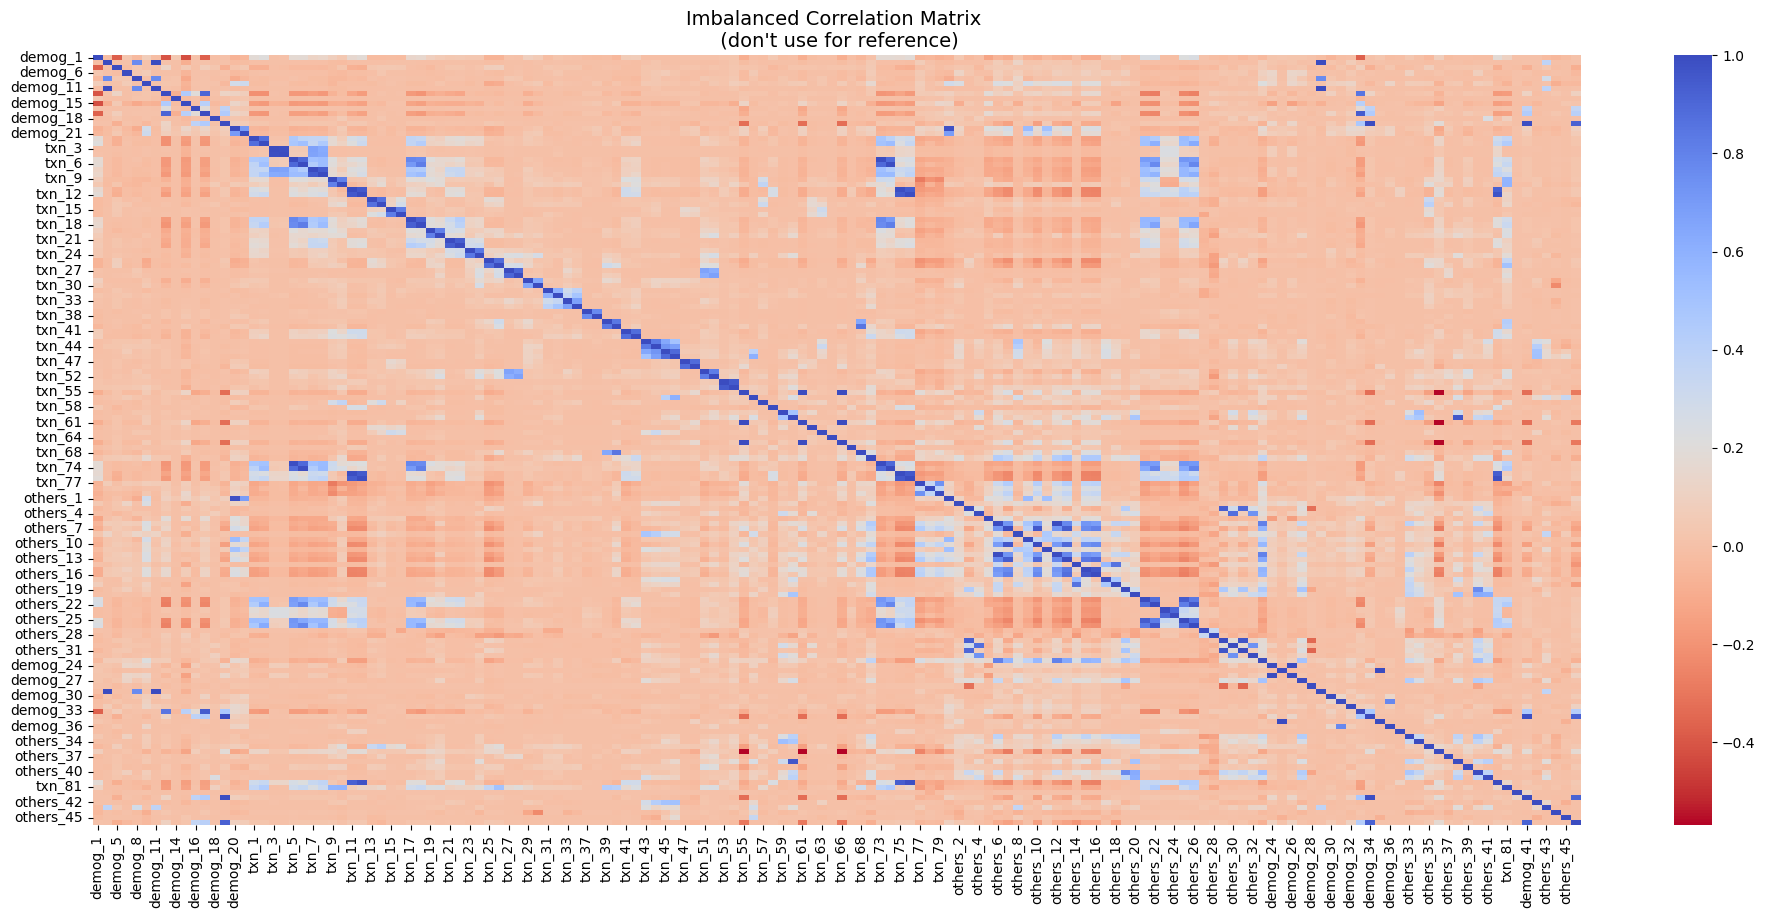

In [320]:
f, ax1= plt.subplots(1, 1, figsize=(24,10))

# Entire DataFrame
corr = num_df_imputed.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)

In [321]:
cols_in_corr = corr.columns
vals = []
for col in cols_in_corr:
  max_value=0
  if col != 'Target':
    for val in corr[col].values:
      if val != 1:
        max_value = max(max_value, abs(val))
  vals.append([max_value, col])
vals = np.array(sorted(vals, reverse=True))[:,1]

In [322]:
# Didn't drop any numerical cols
top_num_corr_cols = list(vals)
less_corr_num_cols = []
less_corr_num_cols

[]

In [323]:
# Dropping the less correlated categorical columns
X_train = X_train.drop(columns=less_corr_cat_cols)
X_test = X_test.drop(columns=less_corr_cat_cols)
X_sub_imputed = X_sub_imputed.drop(columns=less_corr_cat_cols)

# Dropping the less correlated numerical columns
X_train = X_train.drop(columns=less_corr_num_cols)
X_test = X_test.drop(columns=less_corr_num_cols)
X_sub_imputed = X_sub_imputed.drop(columns=less_corr_num_cols)

# Model 2: XGBoost removed irrelavant categorical cols using cramer score
# Accuracy: 99.75%

In [324]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'max_depth': 5,
    'learning_rate': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42,
}

num_round = 100
bst = xgb.train(params, dtrain, num_round, evals=[(dtest, 'eval')], early_stopping_rounds=10)

y_pred_proba = bst.predict(dtest)
y_pred_1 = [1 if prob > 0.5 else 0 for prob in y_pred_proba]

accuracy = accuracy_score(y_test, y_pred_1)
print(f"Accuracy: {accuracy*100}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_1))

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_1)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

[0]	eval-logloss:0.15173
[1]	eval-logloss:0.13474
[2]	eval-logloss:0.12065
[3]	eval-logloss:0.10860
[4]	eval-logloss:0.09816
[5]	eval-logloss:0.08894
[6]	eval-logloss:0.08077
[7]	eval-logloss:0.07351
[8]	eval-logloss:0.06699
[9]	eval-logloss:0.06119
[10]	eval-logloss:0.05607
[11]	eval-logloss:0.05141
[12]	eval-logloss:0.04729
[13]	eval-logloss:0.04359
[14]	eval-logloss:0.04027
[15]	eval-logloss:0.03726
[16]	eval-logloss:0.03455
[17]	eval-logloss:0.03208
[18]	eval-logloss:0.02987
[19]	eval-logloss:0.02790
[20]	eval-logloss:0.02612
[21]	eval-logloss:0.02448
[22]	eval-logloss:0.02299
[23]	eval-logloss:0.02166
[24]	eval-logloss:0.02049
[25]	eval-logloss:0.01942
[26]	eval-logloss:0.01847
[27]	eval-logloss:0.01759
[28]	eval-logloss:0.01680
[29]	eval-logloss:0.01608
[30]	eval-logloss:0.01542
[31]	eval-logloss:0.01480
[32]	eval-logloss:0.01429
[33]	eval-logloss:0.01376
[34]	eval-logloss:0.01332
[35]	eval-logloss:0.01293
[36]	eval-logloss:0.01254
[37]	eval-logloss:0.01222
[38]	eval-logloss:0.01

In [325]:
X_train.shape, X_sub_imputed.shape

((80000, 161), (50000, 161))

In [326]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i, j] > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [327]:

corr_features = correlation(X_train, 0.95)
len(set(corr_features))

16

In [328]:
corr_features

{'demog_11',
 'demog_26',
 'demog_29',
 'demog_33',
 'demog_34',
 'demog_35',
 'demog_41',
 'others_1',
 'others_26',
 'others_29',
 'others_31',
 'txn_4',
 'txn_46',
 'txn_75',
 'txn_76',
 'txn_80'}

In [329]:
X_train = X_train.drop(corr_features,axis=1)
X_test = X_test.drop(corr_features,axis=1)
X_sub_imputed = X_sub_imputed.drop(corr_features, axis=1)

# Model 3: XGBoost by dropping 16 closely correlated cols
# Accuracy: 99.755%

In [330]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'max_depth': 5,
    'learning_rate': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42,
}

num_round = 100
bst = xgb.train(params, dtrain, num_round, evals=[(dtest, 'eval')], early_stopping_rounds=10)

y_pred_proba = bst.predict(dtest)
y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_proba]

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

[0]	eval-logloss:0.15198
[1]	eval-logloss:0.13500
[2]	eval-logloss:0.12086
[3]	eval-logloss:0.10876
[4]	eval-logloss:0.09843
[5]	eval-logloss:0.08916
[6]	eval-logloss:0.08099
[7]	eval-logloss:0.07371
[8]	eval-logloss:0.06722
[9]	eval-logloss:0.06141
[10]	eval-logloss:0.05623
[11]	eval-logloss:0.05160
[12]	eval-logloss:0.04742
[13]	eval-logloss:0.04368
[14]	eval-logloss:0.04034
[15]	eval-logloss:0.03732
[16]	eval-logloss:0.03462
[17]	eval-logloss:0.03216
[18]	eval-logloss:0.03000
[19]	eval-logloss:0.02800
[20]	eval-logloss:0.02621
[21]	eval-logloss:0.02458
[22]	eval-logloss:0.02312
[23]	eval-logloss:0.02182
[24]	eval-logloss:0.02063
[25]	eval-logloss:0.01954
[26]	eval-logloss:0.01854
[27]	eval-logloss:0.01765
[28]	eval-logloss:0.01685
[29]	eval-logloss:0.01612
[30]	eval-logloss:0.01547
[31]	eval-logloss:0.01487
[32]	eval-logloss:0.01434
[33]	eval-logloss:0.01386
[34]	eval-logloss:0.01339
[35]	eval-logloss:0.01298
[36]	eval-logloss:0.01258
[37]	eval-logloss:0.01226
[38]	eval-logloss:0.01

In [331]:
X_train.shape, X_sub_imputed.shape

((80000, 145), (50000, 145))

In [332]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

# Perform ANOVA feature selecmtion
num_features_to_select = 82 # Choose the number of features to select
selector = SelectKBest(score_func=f_classif, k=num_features_to_select)
X_train = selector.fit_transform(X_train, y_train)
X_test = selector.transform(X_test)
X_sub_imputed = selector.transform(X_sub_imputed)

# Model 4: XGBoost model but with top 100 features selected using ANOVA
# Accuracy: 99.78%

In [333]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'max_depth': 5,
    'learning_rate': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 54,
}

num_round = 100
bst = xgb.train(params, dtrain, num_round, evals=[(dtest, 'eval')], early_stopping_rounds=10)

y_pred_proba = bst.predict(dtest)
y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_proba]

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

[0]	eval-logloss:0.15191
[1]	eval-logloss:0.13478
[2]	eval-logloss:0.12078
[3]	eval-logloss:0.10869
[4]	eval-logloss:0.09817
[5]	eval-logloss:0.08883
[6]	eval-logloss:0.08074
[7]	eval-logloss:0.07354
[8]	eval-logloss:0.06712
[9]	eval-logloss:0.06136
[10]	eval-logloss:0.05624
[11]	eval-logloss:0.05156
[12]	eval-logloss:0.04736
[13]	eval-logloss:0.04368
[14]	eval-logloss:0.04033
[15]	eval-logloss:0.03734
[16]	eval-logloss:0.03463
[17]	eval-logloss:0.03216
[18]	eval-logloss:0.02997
[19]	eval-logloss:0.02797
[20]	eval-logloss:0.02620
[21]	eval-logloss:0.02458
[22]	eval-logloss:0.02312
[23]	eval-logloss:0.02179
[24]	eval-logloss:0.02058
[25]	eval-logloss:0.01950
[26]	eval-logloss:0.01849
[27]	eval-logloss:0.01760
[28]	eval-logloss:0.01677
[29]	eval-logloss:0.01605
[30]	eval-logloss:0.01540
[31]	eval-logloss:0.01481
[32]	eval-logloss:0.01426
[33]	eval-logloss:0.01379
[34]	eval-logloss:0.01334
[35]	eval-logloss:0.01290
[36]	eval-logloss:0.01255
[37]	eval-logloss:0.01220
[38]	eval-logloss:0.01

In [334]:
X_train.shape, X_sub_imputed.shape

((80000, 82), (50000, 82))

In [335]:
dsub = xgb.DMatrix(X_sub_imputed)
y_sub_pred_proba = bst.predict(dsub)
y_sub_pred = [1 if prob > 0.5 else 0 for prob in y_sub_pred_proba]

In [336]:
submission_df = pd.DataFrame()
submission_df['primary key'] = primary_keys
submission_df['target values'] = y_sub_pred
submission_df['probability'] = y_sub_pred_proba

In [337]:
submission_df['target values'].value_counts()

0    48997
1     1003
Name: target values, dtype: int64

In [338]:
submission_df.to_csv('epoch0_2.csv', index=False)

# Exploratory Data Analysis and Model Trials

## 21 Demographic features, 79 Taxation features, 42 Other features

In [ ]:
df.describe()

In [ ]:
print(f"The sum of null values is : {df.isnull().sum().max()}")

In [ ]:
print('Not Mules', round(df['Target'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Mules', round(df['Target'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

In [ ]:
unique_values = {}
for column in df.columns:
    unique_values[column] = len(df[column].unique())

In [ ]:
unique_values

### We observe that all columns have atleast two unique values

In [ ]:
df.shape

In [ ]:
for x in df.columns:
  print(x)

### Seperating the `txn_x`, `others_x`, `demog_` and the remaining columns to analyse individual relationships with the target columns.

In [ ]:
demog_df = df.filter(regex='^demog_')
txn_df = df.filter(regex='^txn_')
others_df = df.filter(regex='^others_')
remaining_df = df.drop(columns=demog_df.columns.union(txn_df.columns).union(others_df.columns))

In [ ]:
for column in demog_df.columns:
  print(len(df[column].unique()))

In [ ]:
for column in txn_df.columns:
  print(len(df[column].unique()))

In [ ]:
for column in others_df.columns:
  print(len(df[column].unique()))

In [ ]:
for column in remaining_df.columns:
  print(len(df[column].unique()))

In [ ]:
df_corr = df1.corr()
df_target_corr = df_corr[['Target']]
df_target_corr = df_target_corr.drop(['Target'])
df_target_corr = df_target_corr.iloc[df_target_corr['Target'].abs().argsort()]
df_target_corr

In [ ]:
plt.figure(figsize=(100, 100))
sns.heatmap(df_corr, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.savefig('correlation_heatmap.jpg')
plt.show()

In [ ]:
plt.savefig('correlation_heatmap.jpg')

## Label encoding Process

In [ ]:
categorical_columns = df.drop(['Target'], axis = 1).select_dtypes(include=['object']).columns
print(df[categorical_columns].dtypes)

In [ ]:
df['country_code'] = df['country_code'].fillna('UNKNOWN')
df['country_code'] = df['country_code'].astype('string')
print(df['country_code'].unique())

df['demog_2'] = df['demog_2'].fillna(-1)
df['demog_2'] = df['demog_2'].replace('ZZ', -11)
df['demog_2'] = df['demog_2'].astype('int')
print(df['demog_2'].unique())

target_column = 'income'
df[target_column] = df[target_column].fillna(-1)
df[target_column] = df[target_column].astype('string')
print(df[target_column].unique())

target_column = 'city_tier'
df[target_column] = df[target_column].fillna(-1)
df[target_column] = df[target_column].astype('string')
print(df[target_column].unique())

target_column = 'occupation'
df[target_column] = df[target_column].fillna(-1)
df[target_column] = df[target_column].astype('string')
print(df[target_column].unique())

target_column = 'demog_22'
df[target_column] = df[target_column].fillna('UNKNOWN')
df[target_column] = df[target_column].replace('N', '-11')
df[target_column] = df[target_column].astype('string')
print(df[target_column].unique())

target_column = 'demog_10'
df[target_column] = df[target_column].fillna(-1)
df[target_column] = df[target_column].replace('N', '-11')
df[target_column] = df[target_column].astype('string')
print(df[target_column].unique())

target_column = 'os'
df[target_column] = df[target_column].fillna('UNKNOWN')
df[target_column] = df[target_column].replace('N', '-11')
df[target_column] = df[target_column].astype('string')
print(df[target_column].unique())

target_column = 'demog_40'
df[target_column] = df[target_column].fillna('UNKNOWN')
df[target_column] = df[target_column].replace('N', '-11')
df[target_column] = df[target_column].astype('string')
print(df[target_column].unique())

target_column = 'demog_43'
df[target_column] = df[target_column].fillna('UNKNOWN')
df[target_column] = df[target_column].replace('N', '-11')
df[target_column] = df[target_column].astype('string')
print(df[target_column].unique())

target_column = 'demog_4'
df[target_column] = df[target_column].fillna('UNKNOWN')
df[target_column] = df[target_column].replace('N', '-11')
df[target_column] = df[target_column].astype('string')
print(df[target_column].unique())

target_column = 'email_domain'
df[target_column] = df[target_column].fillna('UNKNOWN')
df[target_column] = df[target_column].replace('N', '-11')
df[target_column] = df[target_column].astype('string')
print(df[target_column].unique())

In [ ]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = df.drop(['Target'], axis = 1).columns
encoded_df = df.copy()

label_encoder = LabelEncoder()

for column in categorical_columns:
    encoded_df[column] = label_encoder.fit_transform(encoded_df[column])

encoded_df.to_parquet('label_encoded_train.parquet')

In [ ]:
encoded_df.to_csv('label_encoded_train.csv')

In [ ]:
df = pd.read_parquet('/content/drive/MyDrive/label_encoded_train.parquet').drop(['Primary key'], axis = 1)

### Logistic Regression Model

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

data = df

X = df.drop(['Target'], axis = 1)
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression(max_iter = 1000)
model.fit(X_train, y_train.values.ravel())

predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
class_report = classification_report(y_test, predictions)

print(f"Accuracy: {accuracy}")
print(f"\nConfusion Matrix:\n{conf_matrix}")
print(f"\nClassification Report:\n{class_report}")

### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

rf_predictions = rf_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_conf_matrix = confusion_matrix(y_test, rf_predictions)
rf_class_report = classification_report(y_test, rf_predictions)

print("Random Forest Classifier:")
print(f"Accuracy: {rf_accuracy:.14f}")
print(f"\nConfusion Matrix:\n{rf_conf_matrix}")
print(f"\nClassification Report:\n{rf_class_report}")

## Balanced DF

In [ ]:
df2 = df1
df_majority = df2[df2['Target'] == 0].sample(n=2000, random_state=42)

df_minority = df2[df2['Target'] == 1].sample(n=2000, random_state=42)

df_balanced = pd.concat([df_majority, df_minority])

df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

## Decision Tree

Decision Tree Classifier: <>
Accuracy: 0.99325000000000

XGBoost Classifier <>
Accuracy: 0.99710000000000

Random Forest Classifier <>
Accuracy: 0.99605000000000

LightGBM Classifier <>
Accuracy: 0.99625000000000

SVM Classifier <>
Accuracy: 0.99545000000000

Extra Trees Classifier <>
Accuracy: 0.99620000000000

K-Nearest Neighbors Classifier <>
Accuracy: 0.99455000000000

Logistic Regression Classifier <>
Accuracy: 0.99535000000000

AdaBoost Classifier <>
Accuracy: 0.99540000000000

SVM Classifier with Linear Kernel <>
Accuracy: 0.99535000000000

Multilayer Perceptron (Neural Network) Classifier <>
Accuracy: 0.99545000000000

Bagging Classifier (Bagged Decision Trees) <>
Accuracy: 0.99505000000000

Linear Discriminant Analysis (LDA) Classifier <>
Accuracy: 0.98745000000000

Passive Aggressive Classifier <>
Accuracy: 0.99145000000000

CatBoost Classifier <>
Accuracy: 0.99685000000000

CatBoost Classifier with Smaller Learning Rate <>
Accuracy: 0.99675000000000

In [ ]:
df_new

In [ ]:
len(cols)

In [ ]:
cols = ['Target','txn_68', 'txn_69', 'demog_20', 'others_1', 'others_17', 'txn_81', 'others_5', 'others_36', 'txn_80', 'others_9', 'demog_43', 'txn_79', 'txn_77', 'txn_78', 'others_15', 'demog_40', 'demog_23', 'others_16', 'others_10', 'others_6', 'others_12', 'others_7', 'others_13']
cols.append('others_23')
cols.append('demog_33')


cols.append('country_code')
cols.append('income')
cols.append('os')
cols.append('demog_2')
cols.append('txn_73')
cols.append('others_2')
cols.append('others_21')
cols.append('demog_24')
cols.append('demog_26')

In [ ]:
cols1 = cols.copy()

In [ ]:
len(cols1)

In [ ]:
cols = [
    'demog_1',
       'demog_2',
        'income',
     'city_tier',
    'occupation',
    'demog_4',
       'demog_5',
     'demog_8',
    'demog_15',
     'demog_20', 'demog_21', 'os',
       'txn_1', 'txn_2',
    'txn_3',
    'txn_4', 'txn_5', 'txn_6', 'txn_7', 'txn_8',
       'txn_9', 'txn_10', 'txn_11', 'txn_12',
       'txn_20',
    'txn_26',
    'txn_30',
    'txn_39',
        'txn_40',
        'txn_41',
       'txn_42',
        'txn_52', 'txn_53','txn_57',
       'txn_68', 'txn_69', 'txn_73', 'txn_74', 'txn_76', 'txn_77',
     'txn_79', 'others_1', 'others_2', 'others_5', 'others_6',
       'others_7', 'others_8', 'others_9', 'others_10',
       'others_12',
        'others_15', 'others_16', 'others_17',
       'others_21', 'others_22', 'others_23',  'others_25',
       'others_26', 'demog_23', 'demog_24', 'demog_26',
        'demog_32',
       'demog_33',
     'others_36', 'others_39', 'txn_80',
       'txn_81', 'email_domain', 'demog_40',
'demog_43', 'Target']

In [ ]:
cols2 = ['country_code', 'demog_1',
       'demog_2', 'income', 'demog_3', 'city_tier', 'occupation', 'demog_4',
       'demog_5', 'demog_8', 'demog_9', 'demog_13', 'demog_14', 'demog_15',
       'demog_16', 'demog_17', 'demog_19', 'demog_20', 'demog_21', 'os',
       'txn_1', 'txn_2', 'txn_3', 'txn_4', 'txn_5', 'txn_6', 'txn_7', 'txn_8',
       'txn_9', 'txn_10', 'txn_11', 'txn_12', 'txn_13', 'txn_14', 'txn_19',
       'txn_20', 'txn_25', 'txn_26', 'txn_30', 'txn_39', 'txn_40', 'txn_41',
       'txn_42', 'txn_51', 'txn_52', 'txn_53', 'txn_54', 'txn_57', 'txn_58',
       'txn_68', 'txn_69', 'txn_73', 'txn_74', 'txn_75', 'txn_76', 'txn_77',
       'txn_78', 'txn_79', 'others_1', 'others_2', 'others_5', 'others_6',
       'others_7', 'others_8', 'others_9', 'others_10', 'others_11',
       'others_12',
         'others_13',
         'others_15', 'others_16', 'others_17',
       'others_21', 'others_22', 'others_23', 'others_24', 'others_25',
       'others_26', 'demog_23', 'demog_24',
         'demog_26', 'demog_30', 'demog_32',
       'demog_33', 'demog_34', 'others_35', 'others_36',
         'others_39',
         'txn_80',
       'txn_81', 'email_domain', 'demog_40', 'demog_41', 'demog_42',
  'demog_43',  'Target']

In [ ]:
cols2[:-1]

In [ ]:
new_cols = []
max_accu = 0.9965
for x in cols2[:-1]:
  if x not in cols1:
  # for j in range(i+1, len(cols1)-1):
        random_col = cols1.copy()
        random_col.append(x)

        data = df1[random_col]
        X = data.drop(['Target'], axis = 1)
        y = data['Target']

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        xgb_model = XGBClassifier(random_state=42)
        xgb_model.fit(X_train, y_train)
        xgb_predictions = xgb_model.predict(X_test)

        accuracy = accuracy_score(y_test, xgb_predictions)

        if accuracy >= 0.9973:
            new_cols.append(x)
            print(f"col = {x}, accuracy = {accuracy}")
            # max_accu = accuracy

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
data = df1
X = data.drop(['Target'], axis=1)
y = data['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Perform ANOVA feature selection
num_features_to_select = 100 # Choose the number of features to select
selector = SelectKBest(score_func=f_classif, k=num_features_to_select)
X_train = selector.fit_transform(X_train, y_train)
X_test = selector.transform(X_test)

In [ ]:
len(X_train[0])

In [ ]:
cols = df1.columns

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler

data = df1
X = data.drop(['Target'], axis=1)
y = data['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
num_features_to_select = 100
selector = SelectKBest(score_func=f_classif, k=num_features_to_select)
X_train = selector.fit_transform(X_train, y_train)
X_test = selector.transform(X_test)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

xgb_predictions = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, xgb_predictions)
print(f"Accuracy= {accuracy}")


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd

data = df1[cols]
X = data.drop(['Target'], axis=1)
y = data['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, xgb_predictions)
print(f"Accuracy= {accuracy}")

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

data = df1[cols]
X, y = data.drop(['Target'], axis=1), data['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

base_models = [
    ('xg_boost', XGBClassifier()),
    ('svm', SVC())
]

stacking_model = StackingClassifier(estimators=base_models, final_estimator=XGBClassifier())

stacking_model.fit(X_train, y_train)

y_pred = stacking_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy:{accuracy}")

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load dataset (replace this with your dataset)
data = df1[cols]
X, y = data.drop(['Target'], axis=1), data['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the base models with default hyperparameters
base_models = [
    ('xg_boost', XGBClassifier()),
    ('svm', SVC())
]

# Define the stacking model (meta-model) with default hyperparameters
stacking_model = StackingClassifier(estimators=base_models, final_estimator=XGBClassifier())

# Perform cross-validation with the stacking model
cv_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # Use StratifiedKFold for classification
cross_val_scores = cross_val_score(stacking_model, X_train, y_train, cv=cv_fold, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Cross-Validation Score:", np.mean(cross_val_scores))

# Train the stacking model on the full training data
stacking_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = stacking_model.predict(X_test)

# Evaluate the performance of the stacking model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Stacking Model on Test Data: {accuracy}")

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load dataset (replace this with your dataset)
data = df1[cols]
X, y = data.drop(['Target'], axis=1), data['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the base models with default hyperparameters
base_models = [
    ('xg_boost', XGBClassifier(
    n_estimators=90,
    learning_rate=0.3,
    max_leaves = 0,
    max_depth=6,
    subsample=1,
    objective='binary:logistic',
    booster='gbtree',
    n_jobs=1,
    gamma=0,
    min_child_weight=1,
    max_delta_step=0,
    colsample_bytree=1,
    colsample_bylevel=1,
    colsample_bynode=1,
    reg_alpha=0,
    reg_lambda=1,
    scale_pos_weight=1,
    base_score=0.5,
    random_state=42,
    importance_type='gain',
)),
    ('knn', KNeighborsClassifier())
]

# Define the stacking model (meta-model) with default hyperparameters
stacking_model = StackingClassifier(estimators=base_models, final_estimator=XGBClassifier())

# Train the stacking model on the full training data
stacking_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = stacking_model.predict(X_test)

# Evaluate the performance of the stacking model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Stacking Model on Test Data: {accuracy}")

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load dataset (replace this with your dataset)
data = df1[cols]
X, y = data.drop(['Target'], axis=1), data['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the base models with default hyperparameters
base_models = [
    ('xg_boost', XGBClassifier(
    n_estimators=90,
    learning_rate=0.5,
    max_leaves = 0,
    max_depth=6,
    subsample=1,
    objective='binary:logistic',
    booster='gbtree',
    n_jobs=1,
    gamma=0,
    min_child_weight=1,
    max_delta_step=0,
    colsample_bytree=1,
    colsample_bylevel=1,
    colsample_bynode=1,
    reg_alpha=0,
    reg_lambda=1,
    scale_pos_weight=1,
    base_score=0.5,
    random_state=42,
    importance_type='gain',
)
),
    ('isolation_forest', IsolationForest(contamination=0.1)),  # Set contamination based on your data characteristics
]

# Train the base models
base_model_predictions = []
for name, model in base_models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_train)
    base_model_predictions.append(predictions)

# Stack the predictions from base models
stacked_X_train = np.column_stack(base_model_predictions)

# Train the final meta-model (XGBClassifier in this case)
final_model = XGBClassifier()
final_model.fit(stacked_X_train, y_train)

# Make predictions on the testing data
base_model_test_predictions = []
for name, model in base_models:
    predictions = model.predict(X_test)
    base_model_test_predictions.append(predictions)

stacked_X_test = np.column_stack(base_model_test_predictions)
y_pred = final_model.predict(stacked_X_test)

# Evaluate the performance of the stacking model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Stacking Model on Test Data: {accuracy}")

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

data = df1
# Generate some example data
X, y = data.drop(['Target']), data['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the base models
base_models = [
    ('sgboost', GradientBoostingClassifier(random_state=42)),
    ('svm', make_pipeline(StandardScaler(), SVC(random_state=42)))
]

# Define the meta-model (stacking classifier)
meta_model = SVC(random_state=42)

# Create the stacking classifier
stacking_classifier = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Train the stacking classifier on the training data
stacking_classifier.fit(X_train, y_train)

# Make predictions on the test data
predictions = stacking_classifier.predict(X_test)

# Evaluate the accuracy of the stacked model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy of the stacked model: {accuracy}")

In [ ]:
for i in range(len(cols1)):
  for j in range(i+1, len(cols1)):
    if sum(df[cols1[i]]==df[cols1[j]]) >= 90000:
      print(cols[i], cols[j], sum(df[cols1[i]]==df[cols1[j]]))

In [ ]:
new_col = []
for col in df1.columns:
  if col not in cols:
    cols1 = cols.copy()
    cols1.append(col)
    data = df1[cols1]
    X = data.drop(['Target'], axis=1)
    y = data['Target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    xgb_model = XGBClassifier(random_state=42)
    xgb_model.fit(X_train, y_train)
    xgb_predictions = xgb_model.predict(X_test)

    accuracy = accuracy_score(y_test, xgb_predictions)
    if accuracy > 0.99655:
      new_col.append(col)
      print(f"Accuracy= {accuracy} col = {col}")

In [ ]:
data.columns

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd

imp_cols = []
data = df_balanced

for col in data.columns:
    X = data[[col]]
    y = data['Target']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    X_train = X_train.values.reshape(-1, 1)
    X_test = X_test.values.reshape(-1, 1)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    dt_model = DecisionTreeClassifier(random_state=42)
    dt_model.fit(X_train, y_train)
    dt_predictions = dt_model.predict(X_test)
    accuracy = accuracy_score(y_test, dt_predictions)
    # print(f"Accuracy= {accuracy} col = {col}")
    if accuracy >= 0.7:
        imp_cols.append(col)
df_new = df_balanced[imp_cols]

In [ ]:
len(imp_cols)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd

data = df_balanced

for col in data.columns:
  if col not in imp_cols and col != 'Target':
    imp_cols_random = imp_cols.copy()
    imp_cols_random.append(col)
    X = data[imp_cols_random].drop(['Target'], axis = 1)
    y = data['Target']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # X_train = X_train.values.reshape(-1, 1)
    # X_test = X_test.values.reshape(-1, 1)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    dt_model = DecisionTreeClassifier(random_state=42)
    dt_model.fit(X_train, y_train)
    dt_predictions = dt_model.predict(X_test)
    accuracy = accuracy_score(y_test, dt_predictions)
    print(f"Accuracy= {accuracy} col = {col}")
    # print(imp_cols_random)
    if accuracy >= 0.98875:
        print(col)
df_new = df1[imp_cols]

In [ ]:
df_new = df1[imp_cols]

In [ ]:
df_new = df_new.drop(['Primary key'], axis =1 )

In [ ]:
df_new

In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

data = df1

X = data.drop(['Target', 'Primary key'], axis=1)
y = data['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Set a smaller learning rate (e.g., 0.01)
catboost_model = CatBoostClassifier(learning_rate=0.01, random_state=42)
catboost_model.fit(X_train, y_train)
catboost_predictions = catboost_model.predict(X_test)

catboost_accuracy = accuracy_score(y_test, catboost_predictions)
catboost_conf_matrix = confusion_matrix(y_test, catboost_predictions)
catboost_class_report = classification_report(y_test, catboost_predictions)

print("CatBoost Classifier with Smaller Learning Rate:")
print(f"Accuracy: {catboost_accuracy:.14f}")
print(f"\nConfusion Matrix:\n{catboost_conf_matrix}")
print(f"\nClassification Report:\n{catboost_class_report}")

## Graph of columns

In [ ]:
import matplotlib.pyplot as plt

for column in df.drop(['Target'], axis=1):
    plt.hist(df0[column], bins=30, alpha = 0.5, label = "Not Mules")
    plt.hist(df1[column], bins = 30, alpha = 0.5, label = "Mules")
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
sum(df['Target'] == 1)

In [ ]:
df.columns

## Column wise analysis

In [ ]:
columns = df.columns

In [ ]:
df = df_original
df0 = df[df['Target'] == 0]
df1 = df[df['Target'] == 1]

In [ ]:
import numpy as np

df0_dict = {}
df1_dict = {}

for col in df0.columns:
    if col == "Target" or col == "Primary key":
      continue
    df0_dict[col] = df0[col].unique()
    df1_dict[col] = df1[col].unique()

In [ ]:
df0['income'].unique()

In [ ]:
df0_dict['txn_1']

In [ ]:
with open('SCAMMER.txt', 'w') as file:
  for col in df1_dict:
    for item in df1_dict[col]:
      if item not in df0_dict[col] and not np.isnan(item):
        file.write(f"Item = {item} is there only for scammers in col = {col} and the count is {sum(df1[col]==item)} ")
        file.write('\n')

In [ ]:
with open('NON_SCAMMER.txt', 'w') as file:
  for col in df0_dict:
      for item in df0_dict[col]:
          if item not in df1_dict[col] and type(item) != str and not np.isnan(item):
              file.write(f"Item = {item} is there only for NON-SCAMMERS in col = {col} and count is {sum(df1[col]==item)}")
              file.write('\n')

## Observation 2:



In [ ]:
x = 'country_code'
print(f"The unique values for non-scammers: {df0_dict['country_code']}")
print(f"The unique values for non-scammers: {df1_dict['country_code']}")



## Observation - 1: The scammers are only from INDIA

In [ ]:
x = 'income'
print(f"The unique values for non-scammers: {df0_dict['income']}")
print(f"The unique values for non-scammers: {df1_dict['income']}")

In [ ]:
x = 'demog_2'
print(f"The unique values for non-scammers: {df0_dict[x]}")
print(f"The unique values for non-scammers: {df1_dict[x]}")

## Checking number of NaN values in all columns

In [ ]:
l_25794= []
for x in df.columns:
  y = df[x].isna().sum()
  if y == 25794:
    l_25794.append(x)

In [ ]:
l_25794

In [ ]:
df_25794 = df[l_25794]

In [ ]:
df

In [ ]:
df_corr = df.corr()
sns.heatmap(df_corr)

In [ ]:
df3=df

In [ ]:
import numpy as np

mask = np.triu(np.ones_like(df_corr, dtype=bool))

high_corr_columns = [column for column in df_corr.columns if any(df_corr[column] > 0.9)]

if 'Target' in high_corr_columns:
    high_corr_columns.remove('Target')

df_filtered = df3.drop(columns=high_corr_columns)

In [ ]:
df = df_filtered

## Reapplying decision tree on dropped df

In [ ]:
df2 = df
df_majority = df2[df2['Target'] == 0].sample(n=2000, random_state=42)

df_minority = df2[df2['Target'] == 1].sample(n=2000, random_state=42)

df_balanced = pd.concat([df_majority, df_minority])

df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
data = df_balanced

X = df_balanced.drop(['Target'], axis = 1)
y = df_balanced['Target']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train1 = scaler.fit_transform(X_train1)
X_test1 = scaler.transform(X_test1)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train1, y_train1)
X_test1 = X_test
dt_predictions = dt_model.predict(X_test1)
y_test1 = y_test
dt_accuracy = accuracy_score(y_test1, dt_predictions)
dt_conf_matrix = confusion_matrix(y_test1, dt_predictions)
dt_class_report = classification_report(y_test1, dt_predictions)

print("Decision Tree Classifier:")
print(f"Accuracy: {dt_accuracy:.14f}")
print(f"\nConfusion Matrix:\n{dt_conf_matrix}")
print(f"\nClassification Report:\n{dt_class_report}")